<a href="https://colab.research.google.com/github/Rushi2436/Airbnb-Booking-Analysis-EDA-Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **IMPORT LIBRARIES**

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
airbnb_df = pd.read_csv('/content/Airbnb NYC 2019.csv')

In [19]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [21]:
airbnb_df.shape

(48895, 16)

In [22]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [24]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [25]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In above code lot of missing values.Reviews per month column had a lot of missing rows but is important for analysis, due to missing values will be replaced with the mean of that column.

In [26]:
airbnb_df['reviews_per_month'].fillna(airbnb_df['reviews_per_month'].mean(),inplace=True)
airbnb_df.drop(columns=['host_name', 'last_review','name'], axis=1, inplace=True)
airbnb_df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Relationship between neighbourhood group and price 

find out the average price in the different neighbourhood group with respect to different room types.

In [27]:
airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

In [ ]:
airbnb_df_avg_price=airbnb_df.groupby(['neighbourhood_group'])['price'].mean()
airbnb_df_avg_price

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

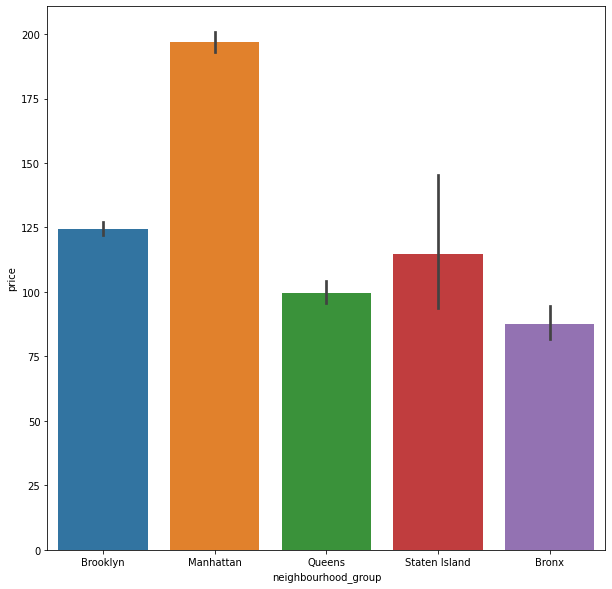

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(data=airbnb_df, x='neighbourhood_group', y='price')

In above graph Manhattan price is high

Text(0.5, 0, 'different_neighbourhood')

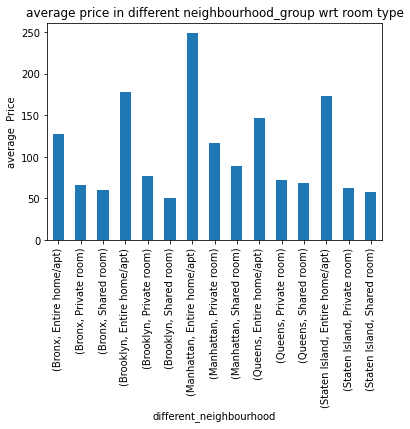

In [29]:
df_avg_price_room=airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean()

df_avg_price_room.plot.bar()

plt.title('average price in different neighbourhood_group wrt room type')
plt.ylabel('average  Price')
plt.xlabel('different_neighbourhood')

In above graph Manhattan is high price as compare to other room type

Outliers treatment in price variable

In [30]:
price=airbnb_df['price']
price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


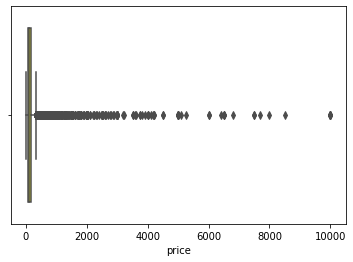

In [32]:
sns.boxplot(price,color='yellow',hue_order='smoker')

In [33]:
IQR=175-69
upper_whisker= int(175+1.5*IQR)
Lower_whisker= int(69-1.5*IQR)
df_without_outlier = airbnb_df[Lower_whisker <= airbnb_df['price'] ]
df_without_outlier= airbnb_df[airbnb_df['price'] <=upper_whisker]
df_without_outlier

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.373221,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.373221,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.373221,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.373221,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


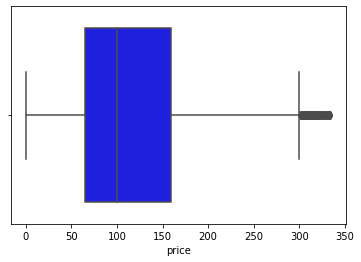

In [34]:
sns.boxplot(df_without_outlier['price'],color='blue')

find out the average price in the different neighbourhood group with respect to different room types without outliers.

Text(0.5, 0, 'different_neighbourhood')

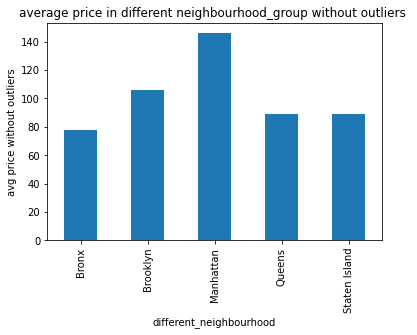

In [35]:
df_airbnb_avg_price=df_without_outlier.groupby(df_without_outlier['neighbourhood_group'])['price'].mean()
df_airbnb_avg_price.plot.bar()
plt.title('average price in different neighbourhood_group without outliers ')
plt.ylabel('avg price without outliers')
plt.xlabel('different_neighbourhood')

Text(0.5, 0, 'different_neighbourhood')

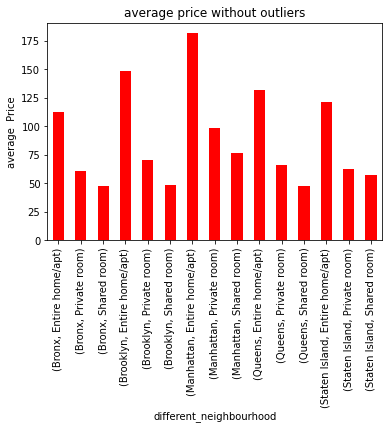

In [36]:
airbnb_df_avg_price_room_type=df_without_outlier.groupby(['neighbourhood_group','room_type'])['price'].mean()
airbnb_df_avg_price_room_type.plot.bar(color ='r')

plt.title('average price without outliers')
plt.ylabel('average  Price')
plt.xlabel('different_neighbourhood')


In [37]:
airbnb_df_avg_price_room_type

neighbourhood_group  room_type      
Bronx                Entire home/apt    112.195592
                     Private room        60.595679
                     Shared room         47.254237
Brooklyn             Entire home/apt    148.202080
                     Private room        70.283443
                     Shared room         48.036496
Manhattan            Entire home/apt    181.688596
                     Private room        98.057700
                     Shared room         75.939785
Queens               Entire home/apt    131.328388
                     Private room        65.732319
                     Shared room         46.989691
Staten Island        Entire home/apt    121.089286
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

Airbnbs on the basis of room types

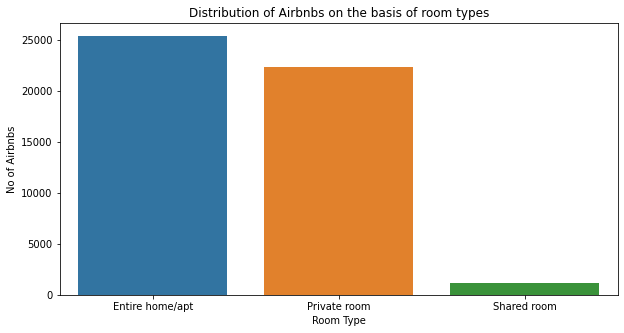

In [38]:

room_type_count = pd.DataFrame({'Room Type':airbnb_df['room_type'].value_counts(ascending=False).index,
                                'No of Airbnbs':airbnb_df['room_type'].value_counts(ascending=False).values})

plt.figure(figsize=(10,5))

figure = sns.barplot(x='Room Type', y='No of Airbnbs', data=room_type_count)

figure.set(title='Distribution of Airbnbs on the basis of room types')

plt.show(figure)
 

In [39]:
print('\n\nPercentage distribution of Airbnbs on the basis of room types:')
airbnb_df['room_type'].value_counts(normalize=True)*100



Percentage distribution of Airbnbs on the basis of room types:


Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

# **Correlation using heatmap**

Text(0.5, 1.0, 'Heatmap')

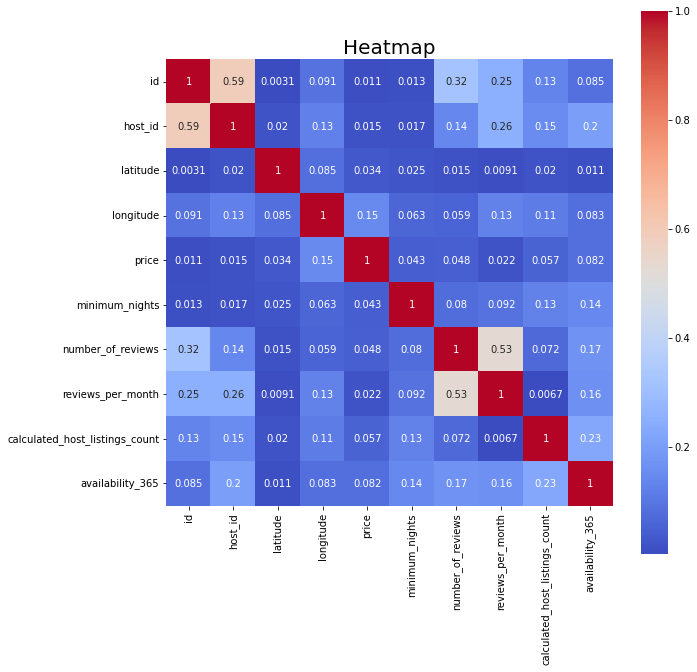

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(airbnb_df.corr()),cmap='coolwarm', annot=True, square=True)
plt.title('Heatmap',fontsize=(20))

Text(0, 0.5, 'Price')

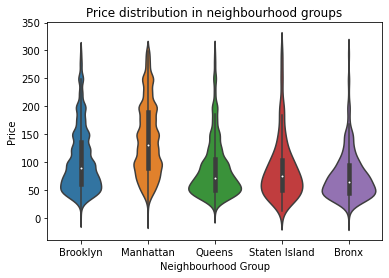

In [41]:
#plot price distribution amongs the groups using violin plot
sns.violinplot(x="neighbourhood_group",y="price", data=airbnb_df[airbnb_df["price"]<300])
plt.title("Price distribution in neighbourhood groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

Noticeable difference in traffic among different areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.ioff>

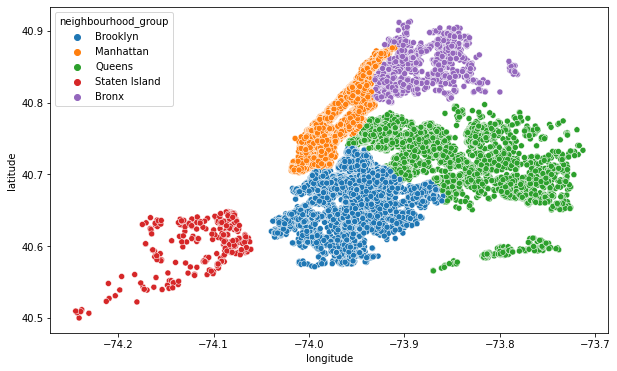

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group)
plt.ioff

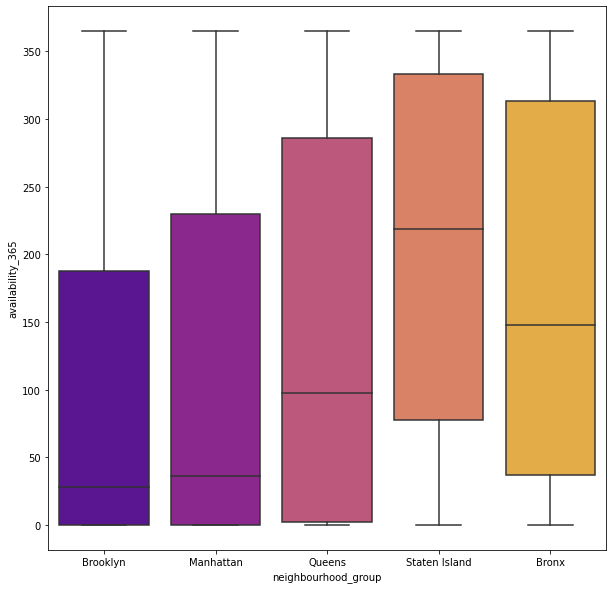

In [43]:
# Let us visualise relationship  between neighbourhood group and availability 365 using boxplot
plt.figure (figsize= (10,10))
ax= sns.boxplot(data=airbnb_df,x='neighbourhood_group',y='availability_365',palette='plasma')

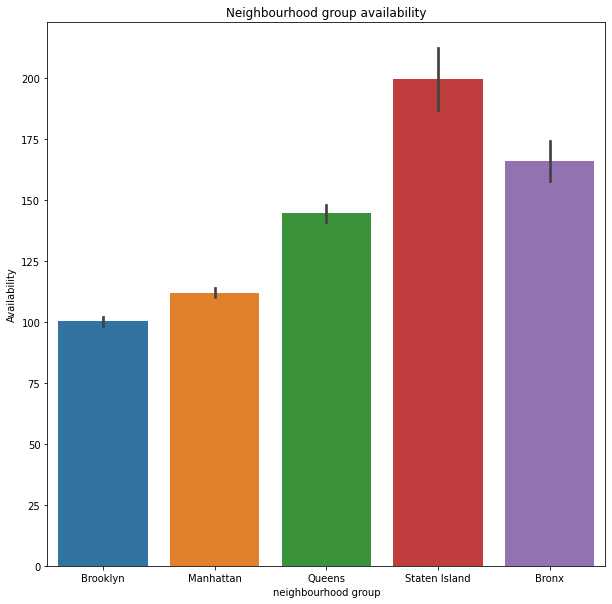

In [44]:
# Availability in different neighbourhood groups
plt.figure(figsize=(10,10))
sns.barplot(x='neighbourhood_group', y='availability_365', data=airbnb_df)
plt.title('Neighbourhood group availability')
plt.ylabel('Availability')
plt.xlabel('neighbourhood group')
plt.show()

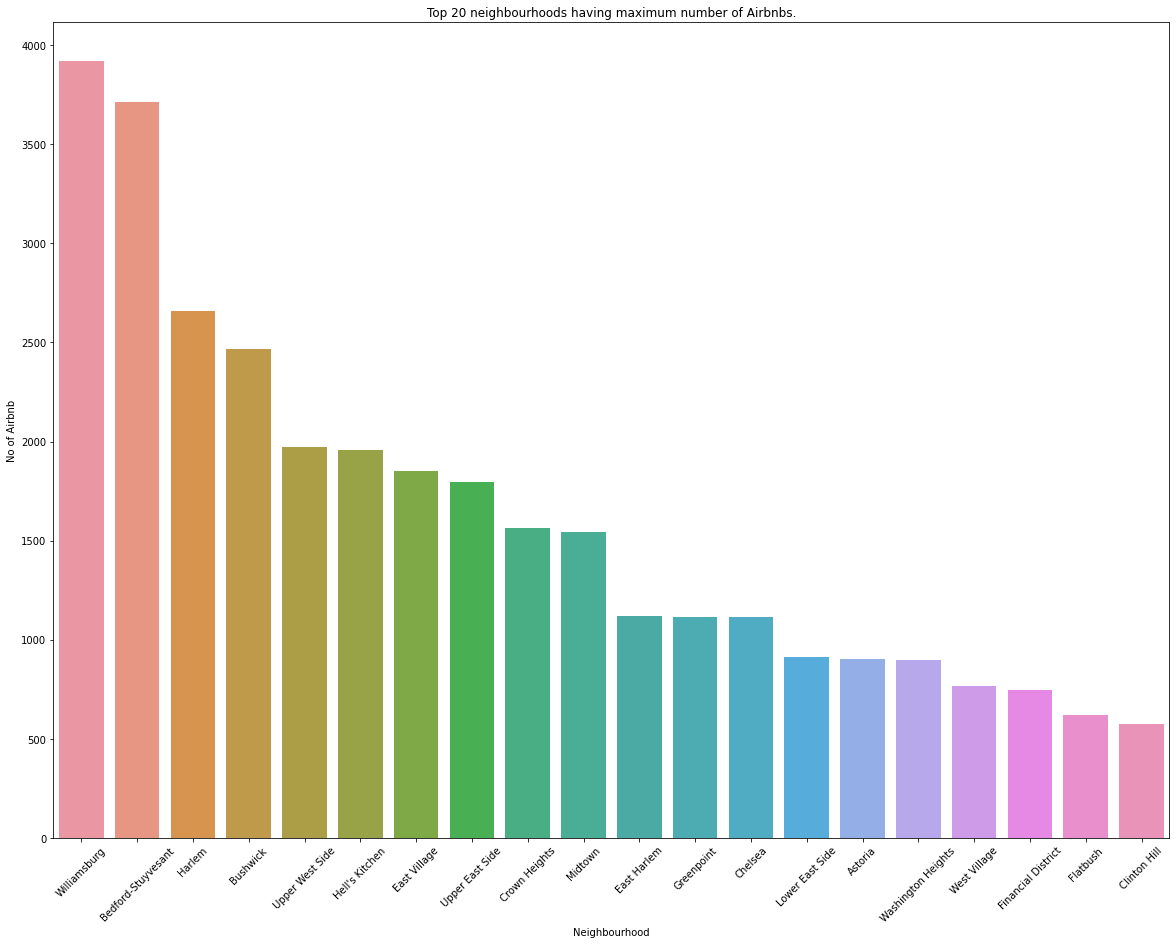

In [45]:
 # Top 20 neighbourhoods having maximum number of Airbnbs
cities = pd.DataFrame({'Neighbourhood':airbnb_df['neighbourhood'].value_counts().index,
                       'No of Airbnb':airbnb_df['neighbourhood'].value_counts().values})[:20]
fig,ax=plt.subplots(figsize=(20,15))
ax.set_xticklabels(labels=cities['Neighbourhood'],rotation=45)
ax.set_title('Top 20 neighbourhoods having maximum number of Airbnbs.')
figure = sns.barplot(x='Neighbourhood',y='No of Airbnb',data=cities)
plt.show(figure)


In [50]:
airbnb_df_num_of_reviews_upto200=airbnb_df[airbnb_df['number_of_reviews']<200]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


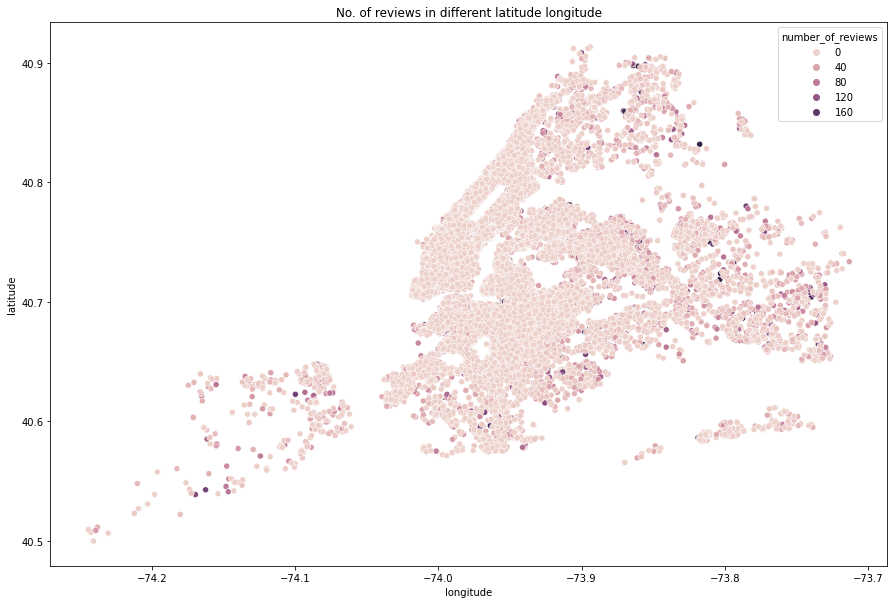

In [52]:
#Number of reviews in different latitude longitude
title='No. of reviews in different latitude longitude'
plt.figure(figsize=(15,10))
sns.scatterplot(airbnb_df.longitude, airbnb_df.latitude, hue=airbnb_df_num_of_reviews_upto200.number_of_reviews).set_title(title)
plt.ioff()